In [1]:
from mlp import *
from mlp.nn import *
from mlp.loss import loss_mapper
from mlp.viz import plot_history
from mlp.metrics import accuracy
from mlp.callbacks import EarlyStopping
from mlp.tools import train_test_split, load, save, binary_encoder
from mlp.optim import MomentumGradientDescent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
y, ohe_map = binary_encoder(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.33, random_state=42)

In [7]:
ohe_map

{0: 'B', 1: 'M'}

In [8]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [9]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

In [10]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='gd', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))

In [11]:
es = EarlyStopping(monitor='val_loss', patience=300)

[    1/10]: loss=0.68174 val_loss=0.68454 accuracy=0.63947 val_accuracy=0.60638 
[    2/10]: loss=0.67169 val_loss=0.67687 accuracy=0.63947 val_accuracy=0.60638 
[    3/10]: loss=0.66107 val_loss=0.66848 accuracy=0.63947 val_accuracy=0.60638 
[    4/10]: loss=0.64589 val_loss=0.65553 accuracy=0.63947 val_accuracy=0.60638 
[    5/10]: loss=0.61890 val_loss=0.63104 accuracy=0.64474 val_accuracy=0.61170 
[    6/10]: loss=0.56899 val_loss=0.58408 accuracy=0.72105 val_accuracy=0.67021 
[    7/10]: loss=0.48941 val_loss=0.50786 accuracy=0.87632 val_accuracy=0.83511 
[    8/10]: loss=0.39538 val_loss=0.41731 accuracy=0.94474 val_accuracy=0.90426 
[    9/10]: loss=0.31343 val_loss=0.33836 accuracy=0.95789 val_accuracy=0.92553 
[   10/10]: loss=0.25341 val_loss=0.28047 accuracy=0.96053 val_accuracy=0.92021 


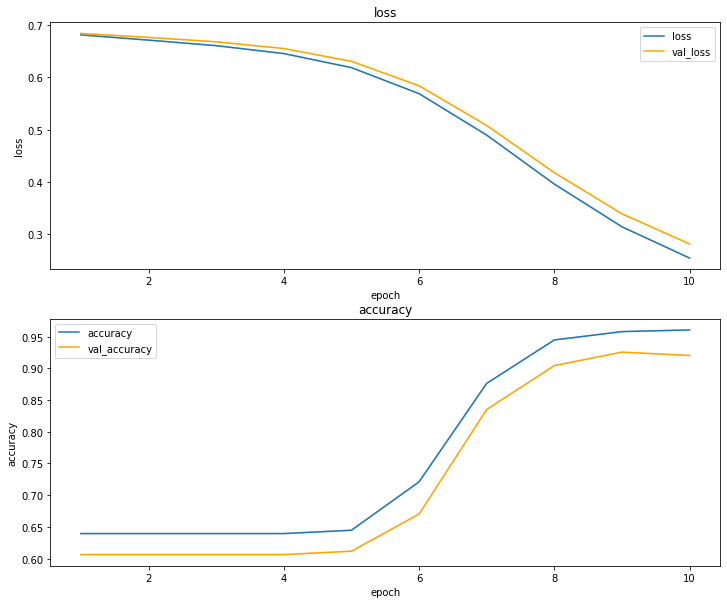

In [12]:
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[    1/10]: loss=0.31975 val_loss=0.34681 accuracy=0.95789 val_accuracy=0.92553 
[    2/10]: loss=0.10330 val_loss=0.13161 accuracy=0.97895 val_accuracy=0.97340 
[    3/10]: loss=0.07545 val_loss=0.10259 accuracy=0.98158 val_accuracy=0.97872 
[    4/10]: loss=0.06620 val_loss=0.09230 accuracy=0.98158 val_accuracy=0.97872 
[    5/10]: loss=0.06125 val_loss=0.08835 accuracy=0.98158 val_accuracy=0.97872 
[    6/10]: loss=0.05792 val_loss=0.08610 accuracy=0.98158 val_accuracy=0.97872 
[    7/10]: loss=0.05549 val_loss=0.08513 accuracy=0.98421 val_accuracy=0.97872 
[    8/10]: loss=0.05333 val_loss=0.08488 accuracy=0.98421 val_accuracy=0.97872 
[    9/10]: loss=0.05146 val_loss=0.08496 accuracy=0.98421 val_accuracy=0.97872 
[   10/10]: loss=0.04970 val_loss=0.08519 accuracy=0.98421 val_accuracy=0.98404 


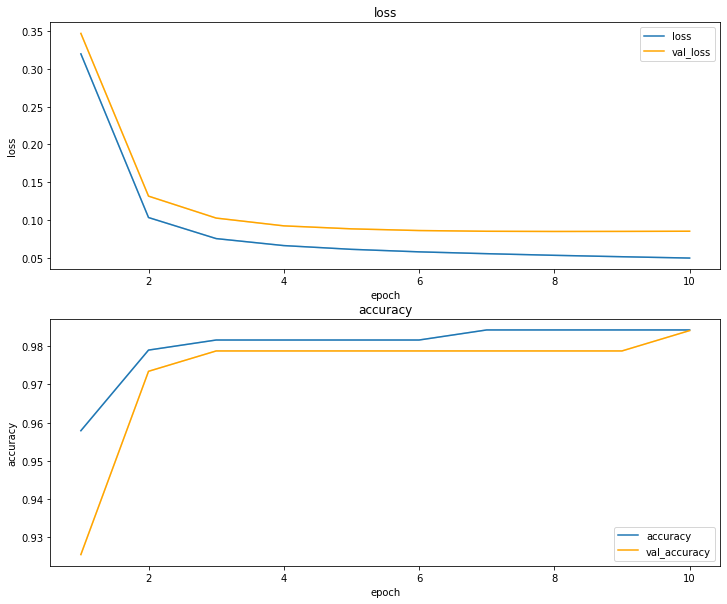

In [13]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='rmsprop', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[    1/10]: loss=0.68685 val_loss=0.68833 accuracy=0.63947 val_accuracy=0.60638 
[    2/10]: loss=0.68046 val_loss=0.68341 accuracy=0.63947 val_accuracy=0.60638 
[    3/10]: loss=0.67447 val_loss=0.67885 accuracy=0.63947 val_accuracy=0.60638 
[    4/10]: loss=0.66859 val_loss=0.67433 accuracy=0.63947 val_accuracy=0.60638 
[    5/10]: loss=0.66235 val_loss=0.66942 accuracy=0.63947 val_accuracy=0.60638 
[    6/10]: loss=0.65513 val_loss=0.66349 accuracy=0.63947 val_accuracy=0.60638 
[    7/10]: loss=0.64605 val_loss=0.65572 accuracy=0.63947 val_accuracy=0.60638 
[    8/10]: loss=0.63393 val_loss=0.64497 accuracy=0.63947 val_accuracy=0.60638 
[    9/10]: loss=0.61719 val_loss=0.62973 accuracy=0.64211 val_accuracy=0.60638 
[   10/10]: loss=0.59391 val_loss=0.60810 accuracy=0.64737 val_accuracy=0.62234 


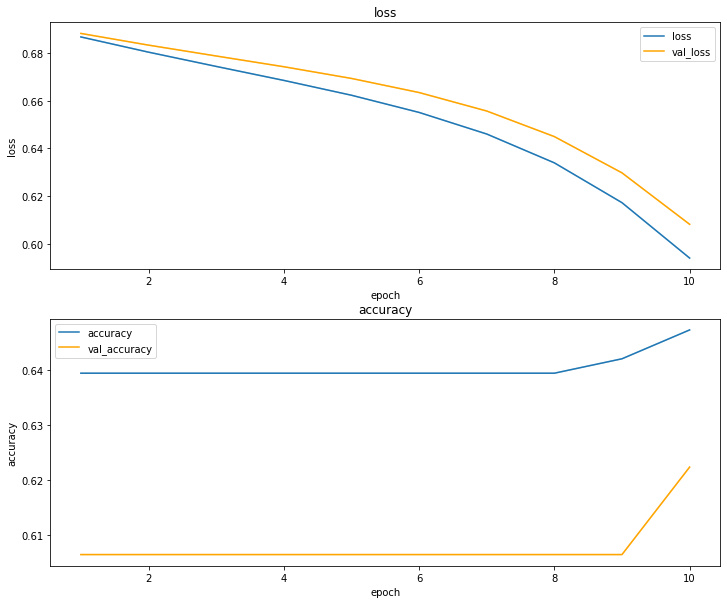

In [14]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='adam', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[    1/10]: loss=0.69349 val_loss=0.69350 accuracy=0.30263 val_accuracy=0.33511 
[    2/10]: loss=0.69343 val_loss=0.69346 accuracy=0.32895 val_accuracy=0.32979 
[    3/10]: loss=0.69337 val_loss=0.69341 accuracy=0.35789 val_accuracy=0.32979 
[    4/10]: loss=0.69331 val_loss=0.69336 accuracy=0.39737 val_accuracy=0.36170 
[    5/10]: loss=0.69325 val_loss=0.69332 accuracy=0.46316 val_accuracy=0.40957 
[    6/10]: loss=0.69319 val_loss=0.69327 accuracy=0.50000 val_accuracy=0.46277 
[    7/10]: loss=0.69313 val_loss=0.69322 accuracy=0.53947 val_accuracy=0.48936 
[    8/10]: loss=0.69307 val_loss=0.69317 accuracy=0.57105 val_accuracy=0.52660 
[    9/10]: loss=0.69301 val_loss=0.69313 accuracy=0.59211 val_accuracy=0.58511 
[   10/10]: loss=0.69295 val_loss=0.69308 accuracy=0.61053 val_accuracy=0.59043 


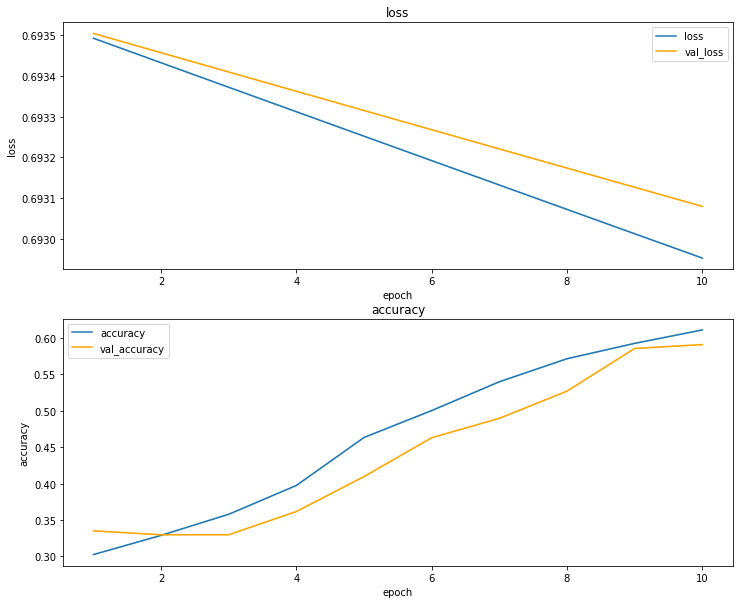

In [15]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='adam', verbose=True, verbose_step=1)
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=10, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)

[   10/100]: loss=0.65273 val_loss=0.67191 accuracy=0.63947 val_accuracy=0.60638 
[   20/100]: loss=0.10280 val_loss=0.13123 accuracy=0.96842 val_accuracy=0.95213 
[   30/100]: loss=0.05319 val_loss=0.08480 accuracy=0.98158 val_accuracy=0.97872 
[   40/100]: loss=0.04185 val_loss=0.09885 accuracy=0.98947 val_accuracy=0.97872 
[   50/100]: loss=0.03002 val_loss=0.12371 accuracy=0.99211 val_accuracy=0.96809 
[   60/100]: loss=0.02113 val_loss=0.15569 accuracy=0.99474 val_accuracy=0.96809 
[   70/100]: loss=0.01545 val_loss=0.18215 accuracy=0.99737 val_accuracy=0.96277 
[   80/100]: loss=0.01179 val_loss=0.20190 accuracy=0.99737 val_accuracy=0.96277 
[   90/100]: loss=0.00937 val_loss=0.21647 accuracy=0.99737 val_accuracy=0.96277 
[  100/100]: loss=0.00760 val_loss=0.23101 accuracy=0.99737 val_accuracy=0.96277 


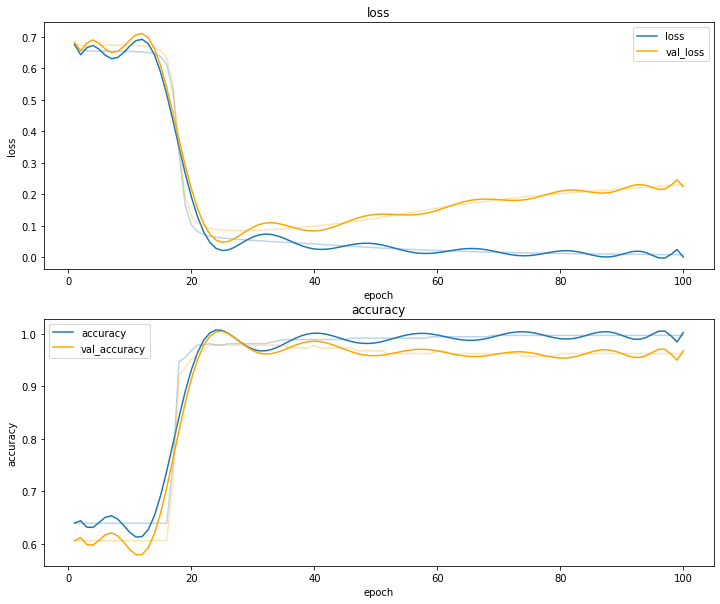

In [18]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer=Adam(lr=0.05), verbose=True, verbose_step=10)
model.add(Dense(30, 'relu'))
model.add(Dense(30, 'elu'))
model.add(Dense(1, activation=Sigmoid()))
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=100, batch_size=32, callbacks=[], metrics=[accuracy], reinitialize=False)
plot_history(h)